Introduction

Sentiment analysis is a technique used in Natural Language Processing (NLP) to extract subjective information from textual data. It involves identifying and categorizing opinions expressed in a piece of text, which can be positive, negative or neutral. Sentiment analysis is used in various applications such as social media monitoring, customer feedback analysis, and movie reviews analysis.

We will perform sentiment analysis on the IMDB dataset, which is a collection of movie reviews along with their corresponding sentiment labels. We will use Python and several libraries such as Pandas, NLTK, and Scikit-learn to preprocess the data, extract features, train a machine learning model, and evaluate its performance.

Step 1: Importing the Required Libraries

The first step is to import the necessary libraries such as Pandas, NLTK, Scikit-learn, and Matplotlib. We will use Pandas to load and manipulate the dataset, NLTK for text preprocessing, Scikit-learn for feature extraction and machine learning, and Matplotlib for data visualization.


In [18]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


Step 2: Loading the Dataset

The next step is to load the IMDB dataset, which contains two columns: "review" and "sentiment". The "review" column contains the movie review text, and the "sentiment" column contains the corresponding sentiment label, which can be "positive" or "negative".


In [19]:
df = pd.read_csv("IMDB Dataset.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [21]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [22]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Step 3: Preprocessing the Data

The raw text data in the "review" column contains a lot of noise and irrelevant information, such as punctuation, numbers, and stop words. Therefore, we need to preprocess the data by performing several steps such as tokenization, removing stop words, and lemmatization.

Tokenization

Tokenization is the process of splitting a piece of text into smaller units called tokens. In our case, we will tokenize each movie review by splitting it into words.

In [23]:
nltk.download('punkt')
df['review'] = df['review'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14704\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removing Stop Words

Stop words are common words that do not carry much meaning, such as "the", "and", "a", etc. We will remove these stop words from the tokenized reviews using NLTK's built-in stop word list.

In [24]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14704\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

Lemmatization is the process of reducing words to their base or dictionary form, called a lemma. This helps to reduce the dimensionality of the data and remove redundant information. We will use NLTK's WordNetLemmatizer for lemmatization.

In [25]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\14704\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Step 4: Feature Extraction 

After preprocessing the data, we need to extract features from the tokenized and lemmatized reviews. In our case, we will use the bag-of-words model to represent each review as a vector of word counts. We will use Scikit-learn's CountVectorizer for this purpose.

In [26]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'].apply(lambda x: ' '.join(x)))

Step 5: Splitting the Dataset into Training and Testing Sets

We need to split the dataset into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [27]:
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Training the Machine Learning Model

After splitting the data, we can train a machine learning model on the training set. In our case, we will use the Multinomial Naive Bayes algorithm, which is a popular algorithm for text classification tasks.

In [28]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

Step 7: Evaluating the Model

Once the model is trained, we can evaluate its performance on the testing set. We will use several metrics such as precision, recall, and F1-score to evaluate the model's performance.

In [29]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4961
    positive       0.87      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Step 8: Visualizing the Results

Finally, we can visualize the results using a confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives.

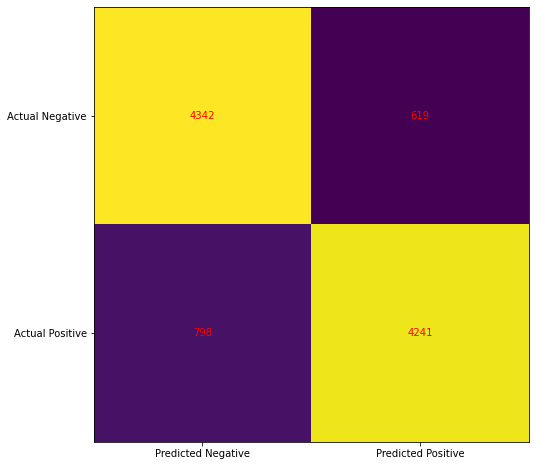

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Negative', 'Predicted Positive'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Negative', 'Actual Positive'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')
plt.show()

Conclusion

Based on the given confusion matrix and classification report, the model has an overall accuracy of 86% on the test data. The precision and recall scores for both classes are relatively high, indicating that the model is able to identify both positive and negative classes with similar accuracy. The F1 score, which is a measure of the balance between precision and recall, is also high for both classes, further indicating that the model performs well.

However, the confusion matrix reveals that there are some false negatives (798) and false positives (619), which means that the model makes some errors in classifying certain instances. The exact impact of these errors would depend on the specific application of the model.

Overall, the model seems to perform well, but it is important to further evaluate its performance on additional metrics and possibly explore ways to improve it.